Add the imports

In [1]:
import pandas as pd
from nba_api.stats.endpoints import playergamelog
from nba_api.stats.library.parameters import SeasonAll
from nba_api.stats.static import players
import matplotlib.pyplot as plt

Get the game log for the players as an array of the chosen stat

In [2]:
def getglog(name,stat):
    # Convert player name into ID
    player = [p for p in players.get_players() if p['full_name'] == name][0]
    pID = player['id']

    # Gamelog of all stats
    glog = playergamelog.PlayerGameLog(player_id=pID, season=SeasonAll.current_season).get_data_frames()[0]


    # Array of the game logs of name and stat
    stat_array = glog[stat].to_numpy()

    stat_array = sorted(stat_array)
    return stat_array


In [3]:
def iqr(set):
    # ranges
    median = int(len(set)/2)
    iq1 = int(len(set)/4)
    iq3 = median + iq1

    innerq = sum(set[iq1:iq3])/(len(set)/2)
    return innerq

In [4]:
# Input values
name = "Shai Gilgeous-Alexander"
stat = 'PTS'
max = 70


# Get the game log
stat_array = getglog(name,stat)

# Ranges
median = int(len(stat_array)/2)
iq1 = int(len(stat_array)/4)
iq3 = median + iq1




print(iqr(stat_array))

n2 = 'Luka Doncic'
st2 = getglog(n2,stat)

n3 = 'Joel Embiid'

n4 = "De'Aaron Fox"

n5 = 'Kawhi Leonard'

n6 = 'Nikola Jokic'

names = [name,n2,n3,n4,n5,n6]
logs = [stat_array,st2,getglog(n3,stat),getglog(n4,stat),getglog(n5,stat),getglog(n6,stat)]





31.169811320754718


Create a Boxplot for players chosen

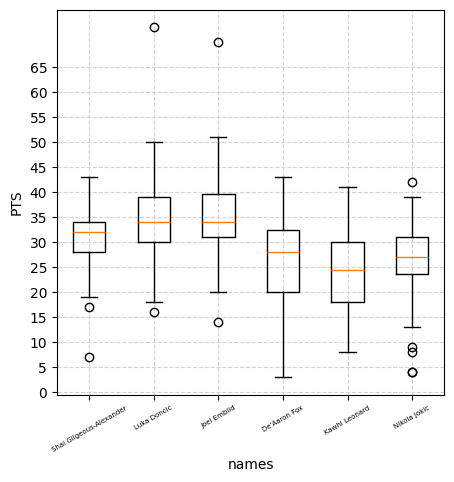

In [5]:
plt.figure(figsize=(5, 5))
plt.xlabel('names')
plt.ylabel(stat)

plt.boxplot(logs)
plt.xticks(range(1, len(names) + 1), names,rotation=30,fontsize=5)
plt.yticks(range(0, max, 5))

plt.grid(True, which='both', color='lightgrey', linestyle='--')

plt.show()